In [4]:
import sys  
sys.path.insert(0, '../')

In [51]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils.convert import to_networkx

from data.dataset import InMemorySokobanDataset
from data.constants import STATE_TO_MEANING
from data.graph_env import GraphEnv
from data.utils import display_graph
from model.graph_centered import GraphCenteredNet
from rl.qlearning_trainer_gc import QLearningGraphCenteredTrainer
from data.embedding import DirectionalPositionalEmbedding, FullyConnectedPositionalEmbedding

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
SEED = 42
TRAIN_PATH = "../levels/dummy_10/train/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
random.seed(SEED)
np.random.seed(SEED)

## Graph environment

### First embedding without wall-wall links

In [222]:
embedding = DirectionalPositionalEmbedding()
dataset = InMemorySokobanDataset(TRAIN_PATH, embedding)
graph_env = GraphEnv(embedding, 'cpu')

state = dataset[0]
graph_env.reset(state)

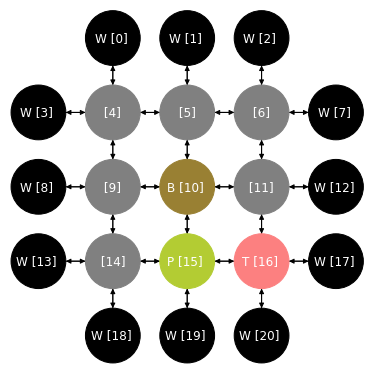

In [223]:
state = graph_env.render()
plt.figure(figsize=(5, 5))
display_graph(state)

In [224]:
next_state, reward, done, info = graph_env.step(
    torch.tensor(16, dtype=torch.long)
)

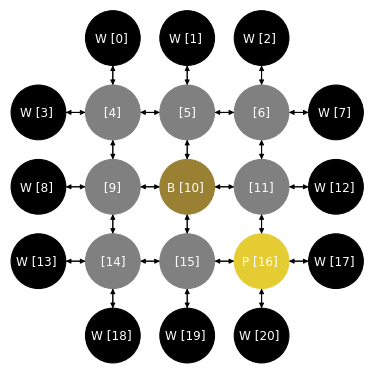

In [225]:
state = graph_env.render()
plt.figure(figsize=(5, 5))
display_graph(state)